In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [13]:
def mean(values, axis=None):
    """Function to use in bootstrap
    Inputs : 
    values : data to average
    axis : axis or axes along which average
    Outputs :
    mean
    """
    if axis:
        return np.mean(values, axis=axis)
    else:
        return np.mean(values)
def resampling(values,B):
    """Creates B samples for the bootstrap (with replacements)
    Inputs : 
    values : data to use 
    B : number of samples needed
    Ouput : 
    x_resampled : array with dim0=B+1, contains the B samples and the original data in the last column 
    (x_resampled[0,:,:])
    """
    if B==1:
        return sklearn.utils.resample(values,replace=True)
    else:
        x_resampled = values
        x_resampled = np.expand_dims(x_resampled,axis=0)
        for i in range(B):
            x_resampled = np.insert(x_resampled,-1,sklearn.utils.resample(values,replace=True),axis=0)
        return x_resampled

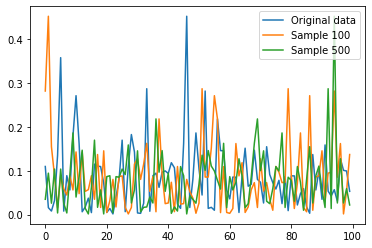

In [11]:
plt.plot(data,label='Original data')
plt.plot(x_resampled[100],label='Sample 100')
plt.plot(x_resampled[500],label='Sample 500')
plt.legend()

In [14]:
means = [mean(i) for i in x_resampled]

In [23]:
alpha = 0.9
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(means, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(means, p)

Text(0.5, 1.0, 'Distibution mean')

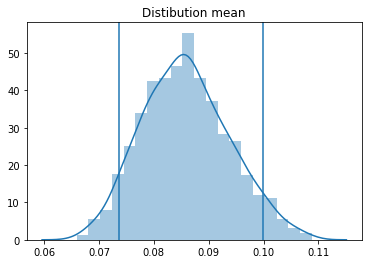

In [25]:
fig,ax = plt.subplots()
sns.distplot(means)
ax.axvline(lower)
ax.axvline(upper)
ax.set_title('Distibution mean')